In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import date2num

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
pd.options.display.max_columns = None
display(train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [7]:
column_with_nan=train.columns[train.isnull().any()]

In [8]:
for column in column_with_nan:
    print(column, train[column].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [9]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train.drop(['Alley'],axis=1,inplace=True)
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train.drop(['GarageYrBlt'],axis=1,inplace=True)
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [10]:
column_with_nan1=train.columns[train.isnull().any()]

In [11]:
for column in column_with_nan1:
    print(column, train[column].isnull().sum())

MasVnrType 8
MasVnrArea 8
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1


In [12]:
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])

In [13]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [14]:
train2 = pd.get_dummies(train)

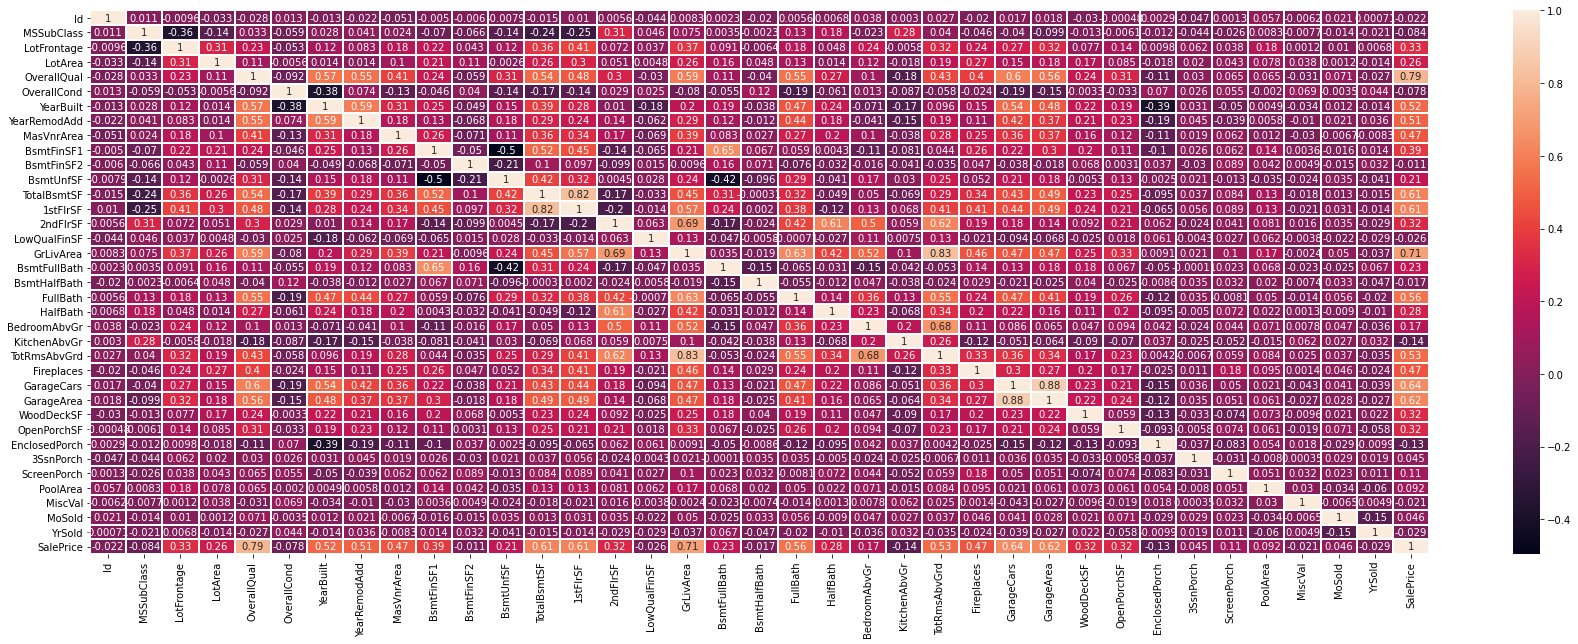

In [15]:
plt.figure(figsize=(30,10))
sns.heatmap(train.corr(), linewidth=1, annot=True)
plt.savefig('housepricecorrelation.png')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


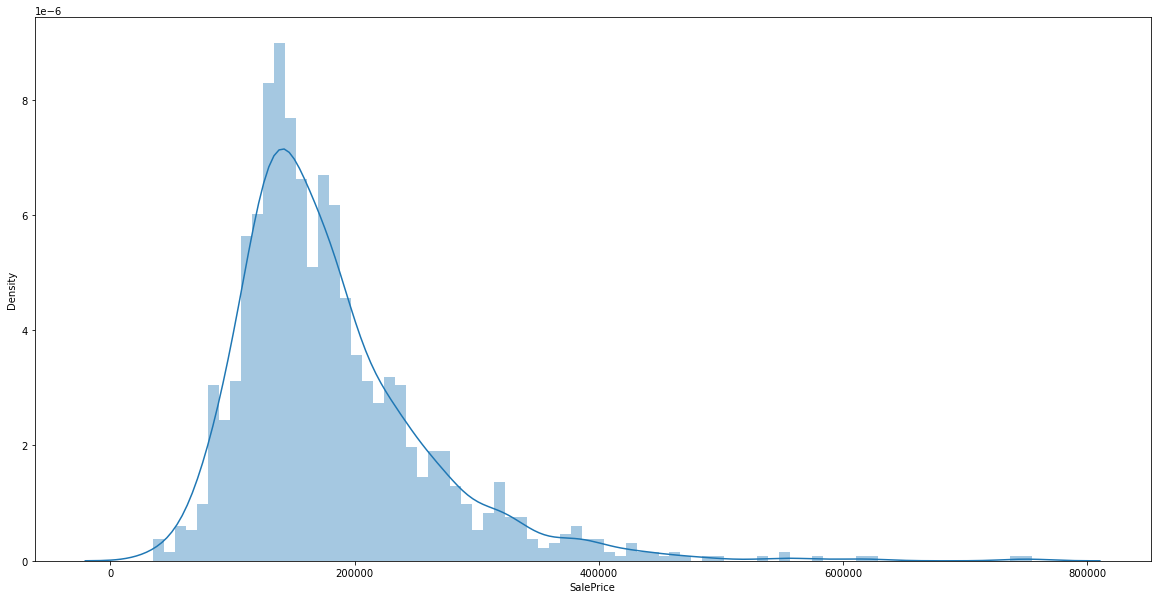

In [16]:
plt.figure(figsize=(20,10))
sns.distplot(train["SalePrice"],bins=80)


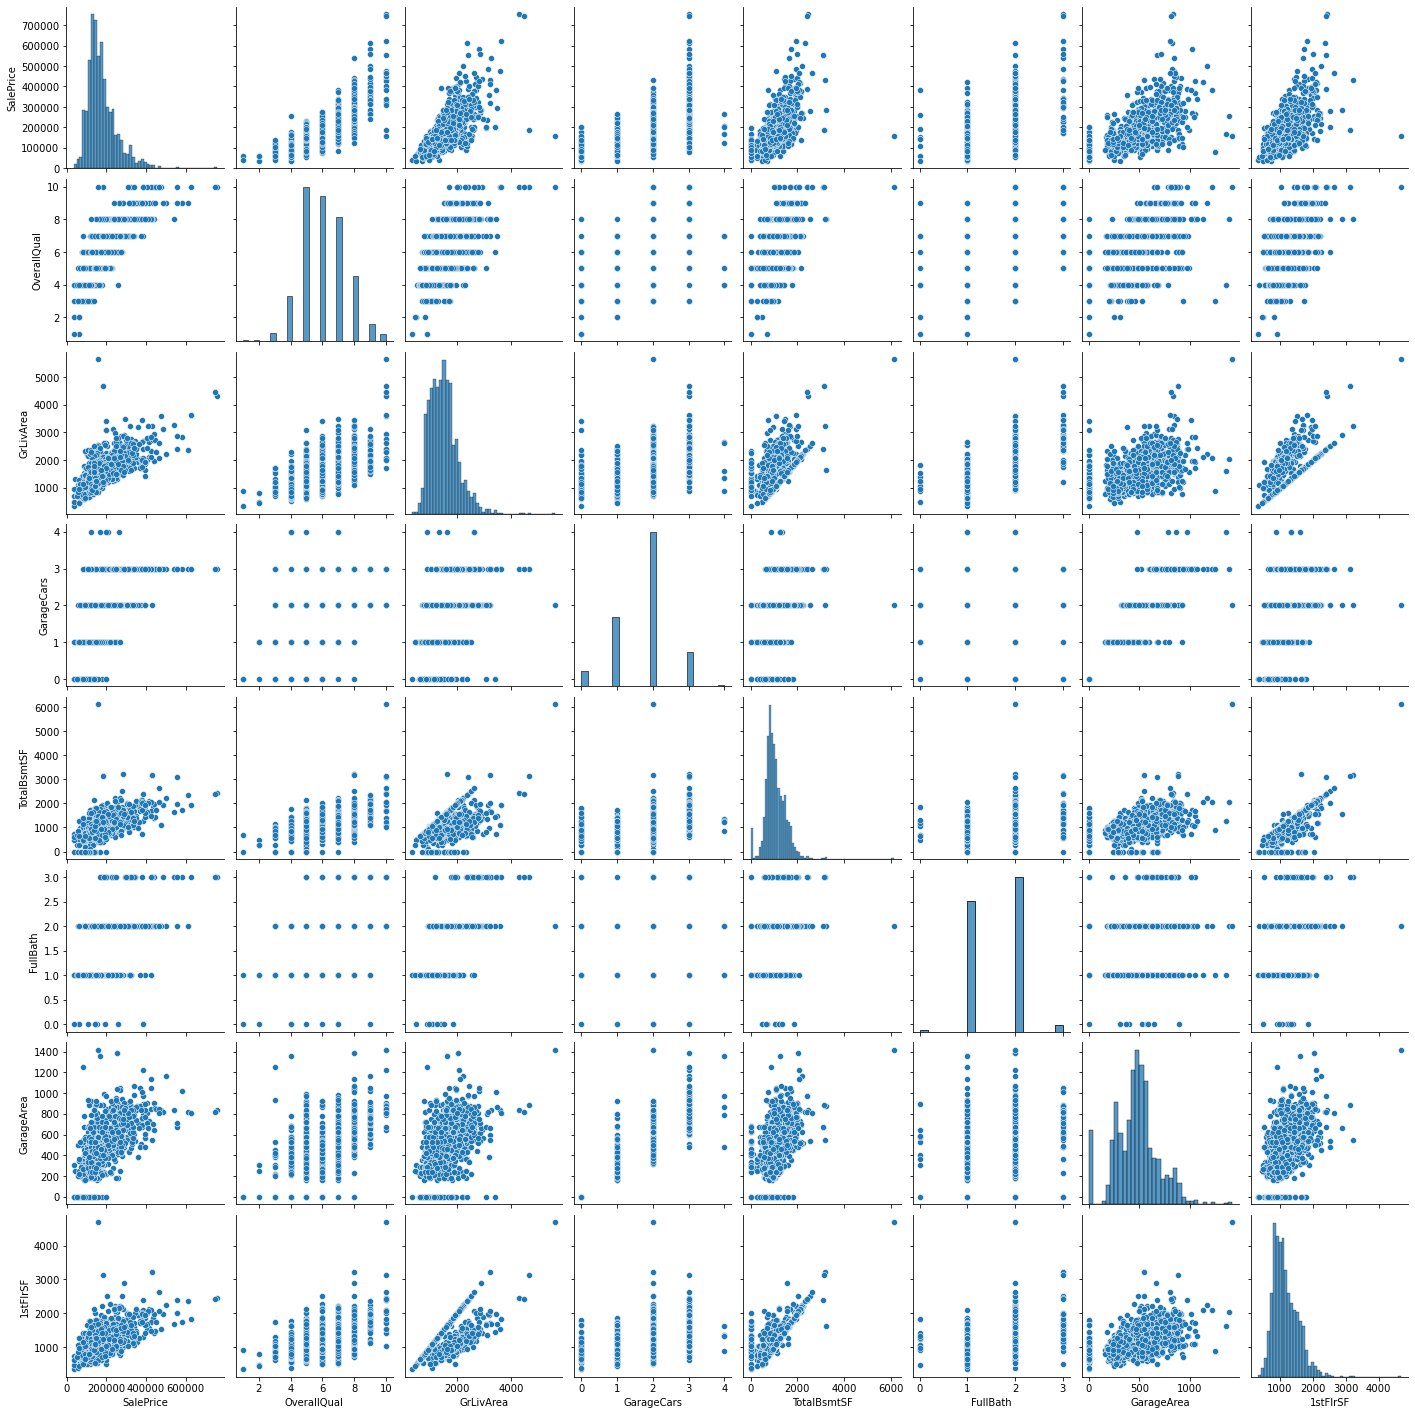

In [17]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','GarageArea','1stFlrSF']
sns.pairplot(train[cols])
plt.show()

In [18]:
clean_data=train[cols]

In [19]:
clean_data.quantile([0.0, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.0])

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,GarageArea,1stFlrSF
0.00,34900.00,1.0,334.00,0.0,0.00,0.0,0.00,334.00
0.01,61815.97,3.0,692.18,0.0,0.00,1.0,0.00,520.00
0.05,88000.00,4.0,848.00,0.0,519.30,1.0,0.00,672.95
0.10,106475.00,5.0,912.00,1.0,636.90,1.0,240.00,756.90
0.25,129975.00,5.0,1129.50,1.0,795.75,1.0,334.50,882.00
0.50,163000.00,6.0,1464.00,2.0,991.50,2.0,480.00,1087.00
0.75,214000.00,7.0,1776.75,2.0,1298.25,2.0,576.00,1391.25
0.90,278000.00,8.0,2158.30,3.0,1602.20,2.0,757.10,1680.00
0.95,326100.00,8.0,2466.10,3.0,1753.00,2.0,850.10,1831.25
0.99,442567.01,10.0,3123.48,3.0,2155.05,3.0,1002.79,2219.46


In [20]:
low = .01
high = .99

quant_df = clean_data.quantile([low, high])
quant_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,GarageArea,1stFlrSF
0.01,61815.97,3.0,692.18,0.0,0.00,1.0,0.00,520.00
0.99,442567.01,10.0,3123.48,3.0,2155.05,3.0,1002.79,2219.46


In [21]:
clean_data = clean_data.loc[(clean_data["GrLivArea"] < quant_df.loc[high, "GrLivArea"])&
                            (clean_data["TotalBsmtSF"] > quant_df.loc[low, "TotalBsmtSF"]) &
                            (clean_data["TotalBsmtSF"] < quant_df.loc[high, "TotalBsmtSF"]) &
                            (clean_data["GarageArea"] > quant_df.loc[low, "GarageArea"]) &
                            (clean_data["GarageArea"] < quant_df.loc[high, "GarageArea"])&
                            (clean_data["1stFlrSF"] < quant_df.loc[high, "1stFlrSF"])&
                            (clean_data["SalePrice"] > quant_df.loc[low, "SalePrice"])&
                            (clean_data["SalePrice"] < quant_df.loc[high, "SalePrice"])]

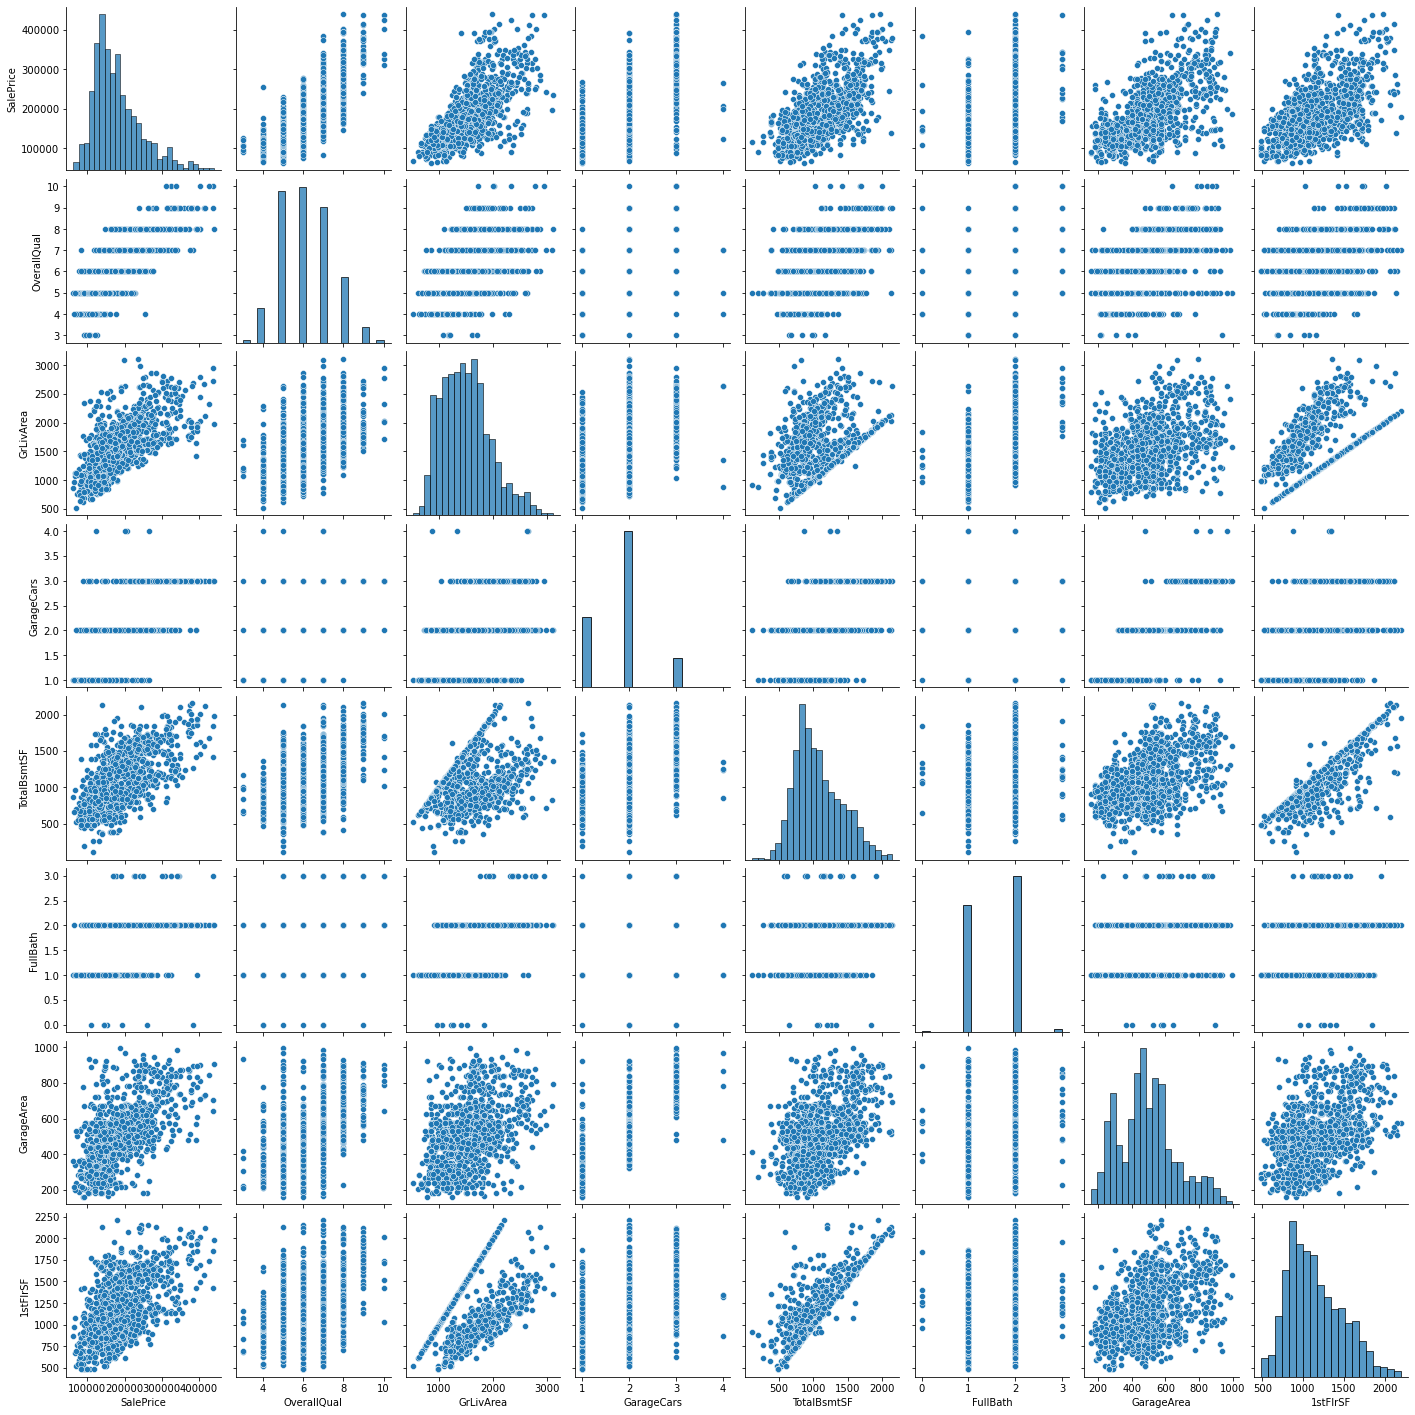

In [22]:
sns.pairplot(clean_data)
plt.show()

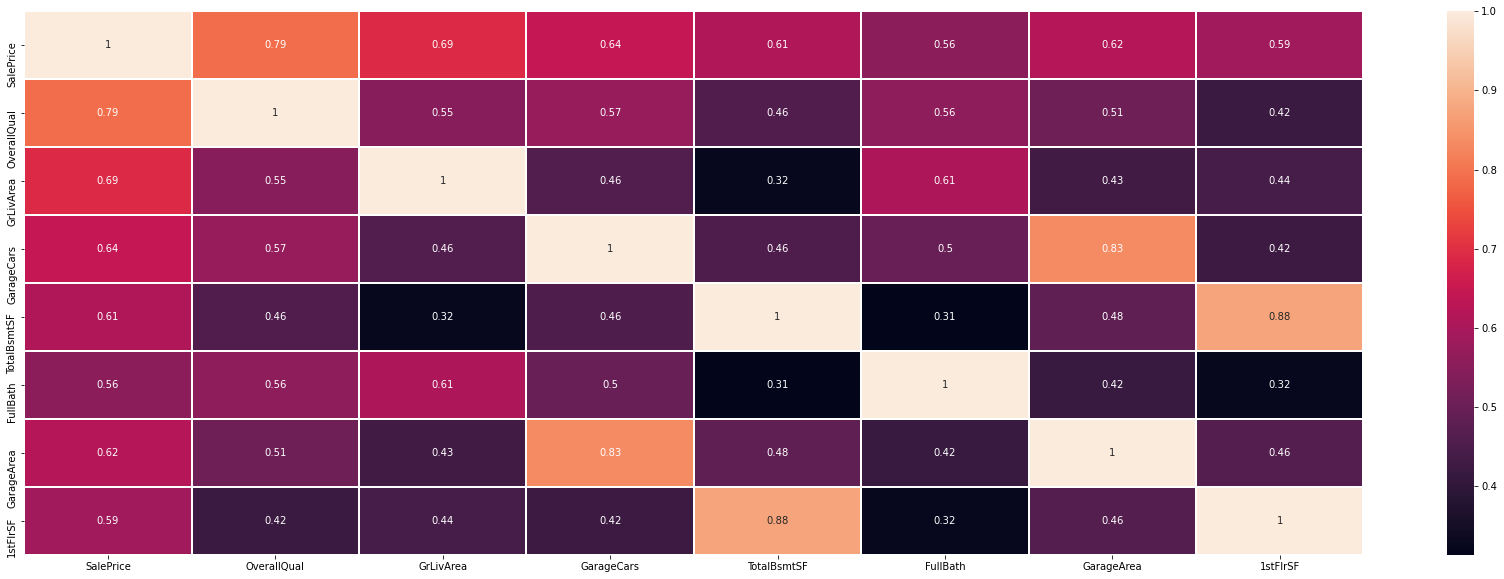

In [23]:
plt.figure(figsize=(30,10))
sns.heatmap(clean_data.corr(), linewidth=1, annot=True)
plt.show()

In [24]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
clean_data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,GarageArea,1stFlrSF
0,208500,7,1710,2,856,2,548,856
1,181500,6,1262,2,1262,2,460,1262
2,223500,7,1786,2,920,2,608,920
3,140000,7,1717,3,756,1,642,961
4,250000,8,2198,3,1145,2,836,1145


In [26]:
X = clean_data.loc[:, ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","GarageArea","1stFlrSF"]]
y = np.log(clean_data["SalePrice"])

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     724.4
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:59:28   Log-Likelihood:                 587.35
No. Observations:                1300   AIC:                            -1159.
Df Residuals:                    1292   BIC:                            -1117.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5643      0.023    465.727      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif

,VIF Factor,features
0,28.027555,const
1,1.991758,OverallQual
2,2.066676,GrLivArea
3,3.796816,GarageCars
4,4.971078,TotalBsmtSF
5,1.870421,FullBath
6,3.482269,GarageArea
7,4.995208,1stFlrSF


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [29]:
x = clean_data.loc[:, ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","FullBath","GarageArea","1stFlrSF"]]
y = np.log(clean_data["SalePrice"])

In [30]:
# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)


# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [31]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

result = lm.predict(x_test)
result2 = lm.predict(x_train)
print('R^2: ', metrics.r2_score(y_test, result))
print('MSE: ', metrics.mean_squared_error(y_test,result))
print('R^2: ', metrics.r2_score(y_train, result2))
print('MSE: ', metrics.mean_squared_error(y_train,result2))

Coefficients:  [1.12300753e-01 2.25800934e-04 5.17457669e-02 2.10344361e-04
 3.21412061e-02 1.53684913e-04 1.66666789e-05]
Intercept:  10.548577576207446
R^2:  0.816997885308023
MSE:  0.019606718269683732
R^2:  0.7882317349943635
MSE:  0.02557410946151498


Text(0, 0.5, 'Predicted values')

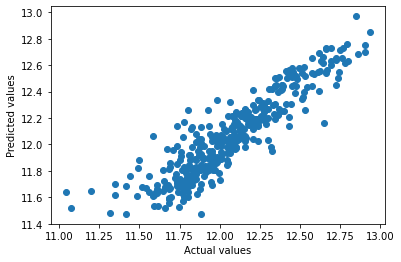

In [32]:
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [33]:
test_result = pd.concat([x_test, y_test], axis=1)
test_result["y_hat"] = lm.predict(x_test)
test_result["residuals"] = y_test - lm.predict(x_test)

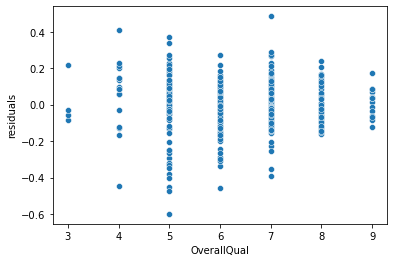

In [34]:
sns.scatterplot(data=test_result, x="OverallQual", y="residuals")

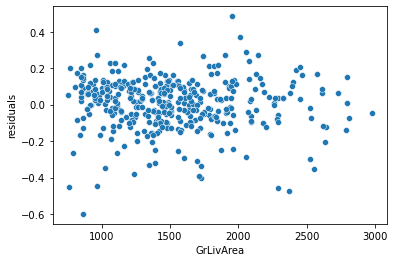

In [35]:
sns.scatterplot(data=test_result, x="GrLivArea", y="residuals")

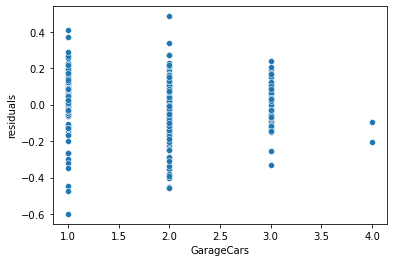

In [36]:
sns.scatterplot(data=test_result, x="GarageCars", y="residuals")

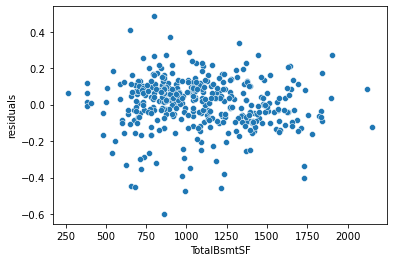

In [37]:
sns.scatterplot(data=test_result, x="TotalBsmtSF", y="residuals")

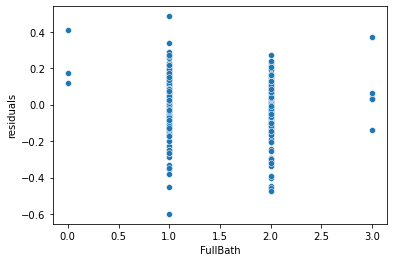

In [38]:
sns.scatterplot(data=test_result, x="FullBath", y="residuals")

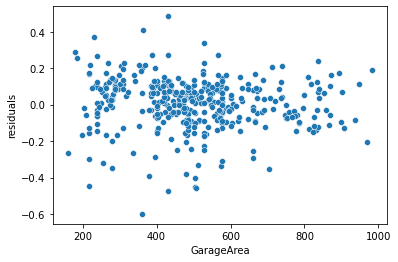

In [39]:
sns.scatterplot(data=test_result, x="GarageArea", y="residuals")

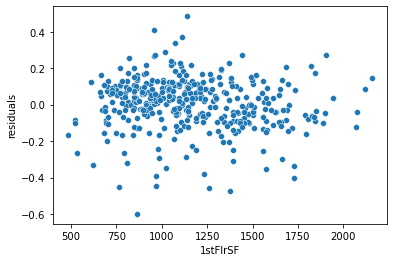

In [40]:
sns.scatterplot(data=test_result, x="1stFlrSF", y="residuals")

In [41]:
import xgboost as xgb


In [42]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
result1=xgb_model.predict(x_test)

In [44]:
print('R^2: ', metrics.r2_score(y_test, result1))
print('MSE: ', metrics.mean_squared_error(y_test,result1))

R^2:  0.7608181812923965
MSE:  0.025625772371668375


In [45]:
clean_data2= train2

In [46]:
quant_df2 = clean_data2.quantile([low, high])
quant_df2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex

In [47]:
clean_data2 = clean_data2.loc[(clean_data2["GrLivArea"] < quant_df.loc[high, "GrLivArea"])&
                            (clean_data2["TotalBsmtSF"] > quant_df.loc[low, "TotalBsmtSF"]) &
                            (clean_data2["TotalBsmtSF"] < quant_df.loc[high, "TotalBsmtSF"]) &
                            (clean_data2["GarageArea"] > quant_df.loc[low, "GarageArea"]) &
                            (clean_data2["GarageArea"] < quant_df.loc[high, "GarageArea"])&
                            (clean_data2["1stFlrSF"] < quant_df.loc[high, "1stFlrSF"])&
                            (clean_data2["SalePrice"] > quant_df.loc[low, "SalePrice"])&
                            (clean_data2["SalePrice"] < quant_df.loc[high, "SalePrice"])]

In [48]:
df_train=clean_data2

In [49]:
test=pd.read_csv('test.csv')

In [50]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test.drop(['Alley'],axis=1,inplace=True)
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test.drop(['GarageYrBlt'],axis=1,inplace=True)
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['Electrical']=test['Electrical'].fillna(test['Electrical'].mode()[0])

In [51]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal


In [52]:
column_with_nan=test.columns[test.isnull().any()]

In [53]:
for column in column_with_nan:
    print(column, test[column].isnull().sum())

MSZoning 4
Utilities 2
Exterior1st 1
Exterior2nd 1
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
GarageCars 1
GarageArea 1
SaleType 1


In [54]:
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mean())
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mean())
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())    
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

In [55]:
test2 = pd.get_dummies(test)

In [56]:
df_test=test2

In [57]:
df_test.isnull().sum()


Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
                        ..
GarageFinish_Fin         0
GarageFinish_RFn         0
GarageFinish_Unf         0
GarageQual_Fa            0
GarageQual_Gd            0
GarageQual_Po            0
G

In [58]:
df_test.shape

(1459, 259)

In [59]:
df_train.shape

(1300, 276)

In [60]:
msf=list(set(df_train.columns.values)-set(df_test.columns.values))
df_train=df_train.drop(msf,axis=1)
msf=list(set(df_test.columns.values)-set(df_train.columns.values))
df_test=df_test.drop(msf,axis=1)

In [61]:
df_test.shape

(1459, 259)

In [62]:
df_train.shape

(1300, 259)

In [63]:
X = clean_data2.loc[:, (clean_data2.columns != "SalePrice")]
y = np.log(clean_data2[["SalePrice"]])
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     80.14
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:59:32   Log-Likelihood:                 1415.5
No. Observations:                1300   AIC:                            -2383.
Df Residuals:                    1076   BIC:                            -1225.
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.06

In [64]:
x = df_train
y = np.log(clean_data2[["SalePrice"]])

In [65]:
# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 50)
# The function to call linear regression on the train set
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [66]:
print("Coefficients: ", lm.coef_)
print("Intercept: ", lm.intercept_)

result = lm.predict(x_test)
result2 = lm.predict(x_train)
print('R^2: ', metrics.r2_score(y_test, result))
print('MSE: ', metrics.mean_squared_error(y_test,result))
print('R^2: ', metrics.r2_score(y_train, result2))
print('MSE: ', metrics.mean_squared_error(y_train,result2))

Coefficients:  [[-8.84516916e-06 -4.96762357e-04  4.01212495e-04  2.86971864e-06
   3.35774604e-02  3.97899724e-02  2.30805418e-03  5.62167559e-04
   1.74207258e-05  7.93974479e-05  2.86652104e-05 -5.20585035e-06
   1.02856814e-04  1.01614802e-04  9.57073947e-05 -4.20908471e-05
   1.55231352e-04  1.13565481e-02  3.29601740e-03  1.89995272e-02
   1.94489473e-02  7.24306748e-03 -5.93570520e-02  1.71865043e-03
   2.73262946e-02  1.53435549e-02  9.87212268e-05  8.90348463e-05
   1.41072441e-04  6.22553206e-05  1.65816688e-04  2.31218448e-04
   2.54594479e-04  4.03465857e-06  2.00149055e-03  6.36055977e-04
  -2.25095903e-01  9.25456283e-02  7.71427130e-02  6.19560412e-02
  -6.54847970e-03 -8.38181470e-02  8.38181470e-02  5.52483843e-03
  -2.39165180e-03  2.02544052e-03 -5.15862715e-03  4.33654958e-02
   3.79544952e-03 -2.91131606e-02 -1.80477847e-02  2.31563506e-01
   1.97149596e-02  3.69459479e-02 -1.62909813e-02 -4.95113796e-02
   9.14145337e-03  6.95066424e-02  6.99661544e-02 -1.39472797

Text(0, 0.5, 'Predicted values')

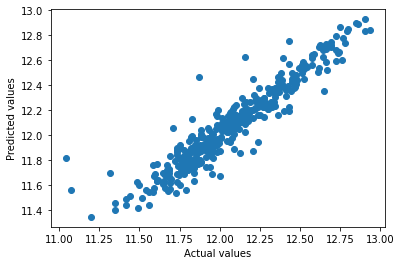

In [67]:
plt.scatter(y_test, result)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [68]:
y_pred=lm.predict(df_test)

In [69]:
Saleprice=pd.DataFrame(y_pred)
Saleprice

,0
0,11.730369
1,12.043059
2,12.146474
3,12.223327
4,12.178642
5,12.047564
6,12.078687
7,12.024916
8,12.160110
9,11.661497


In [70]:
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice':Saleprice.iloc[:,0]})
my_submission.to_csv('submission.csv', index=False)

In [71]:
my_submission["SalePrice"] = np.exp(my_submission["SalePrice"])

In [72]:
my_submission.to_csv('submission.csv', index=False)